## House Sale Price Prediction
### Problem Statamnet:

Purchasing a house can be a huge commitment . As a real estate agent, I  would like our clients to get the best features they can get for their budget.
We want to find out the top 5 features that has greater impact to the house value. (i.e has large coefficient in out model), and to find out how much they probably need to spend on purchasing a house with features that they want



In [1]:
import numpy as np 
import pandas as pd 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,ElasticNet, Lasso


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#train.info()

In [5]:
train.describe(include='all')

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051,1721.000000,2051.000000,2051,140,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051,2051,2051,2029,2029.000000,2051,2051,2051,1996,1996,1993,1996,2050.000000,1995,2050.000000,2050.000000,2050.000000,2051,2051,2051,2051,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051.000000,2051,2051.000000,1051,1938,1937.000000,1937,2050.000000,2050.000000,1937,1937,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,9,400,65,2051.000000,2051.000000,2051.000000,2051,2051.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,6,15,15,4,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,5,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,NaN
freq,NaN,NaN,NaN,1598,NaN,NaN,2044,85,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,NaN,NaN,NaN,NaN,1619,2025,724,721,1218,NaN,1247,1778,926,887,1834,1339,615,NaN,1749,NaN,NaN,NaN,2018,1065,1910,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1047,NaN,1915,NaN,523,1213,NaN,849,NaN,NaN,1832,1868,1861,NaN,NaN,NaN,NaN,NaN,NaN,4,227,56,NaN,NaN,NaN,1781,NaN
mean,1474.033642,7.135900e+08,57.008776,NaN,69.055200,10065.208191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.112140,5.562165,1971.708922,1984.190151,NaN,NaN,NaN,NaN,NaN,99.695909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.300488,NaN,47.959024,567.728293,1057.987805,NaN,NaN,NaN,NaN,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,NaN,6.435885,NaN,0.590931,NaN,NaN,1978.707796,NaN,1.776585,473.671707,NaN,NaN,NaN,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,NaN,NaN,NaN,51.574354,6.219893,2007.775719,NaN,181469.701609
std,843.980841,1.886918e+08,42.824223,NaN,23.260653,6742.488909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426271,1.104497,30.177889,21.036250,NaN,NaN,NaN,NaN,NaN,174.963129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.204124,NaN,165.000901,444.954786,449.410704,NaN,NaN,NaN,NaN,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,NaN,1.560225,NaN,0.638516,NaN,NaN,25.441094,NaN,0.764537,215.934561,NaN,NaN,NaN,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,NaN,NaN,NaN,573.393985,2.744736,1.312014,NaN,79258.659352
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000

In [6]:
train.isnull().sum().sort_values().tail()

Fireplace Qu    1000
Fence           1651
Alley           1911
Misc Feature    1986
Pool QC         2042
dtype: int64

In [7]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
numeric_features = X_train._get_numeric_data().columns.tolist()[2:]

## Find outliers

<AxesSubplot:>

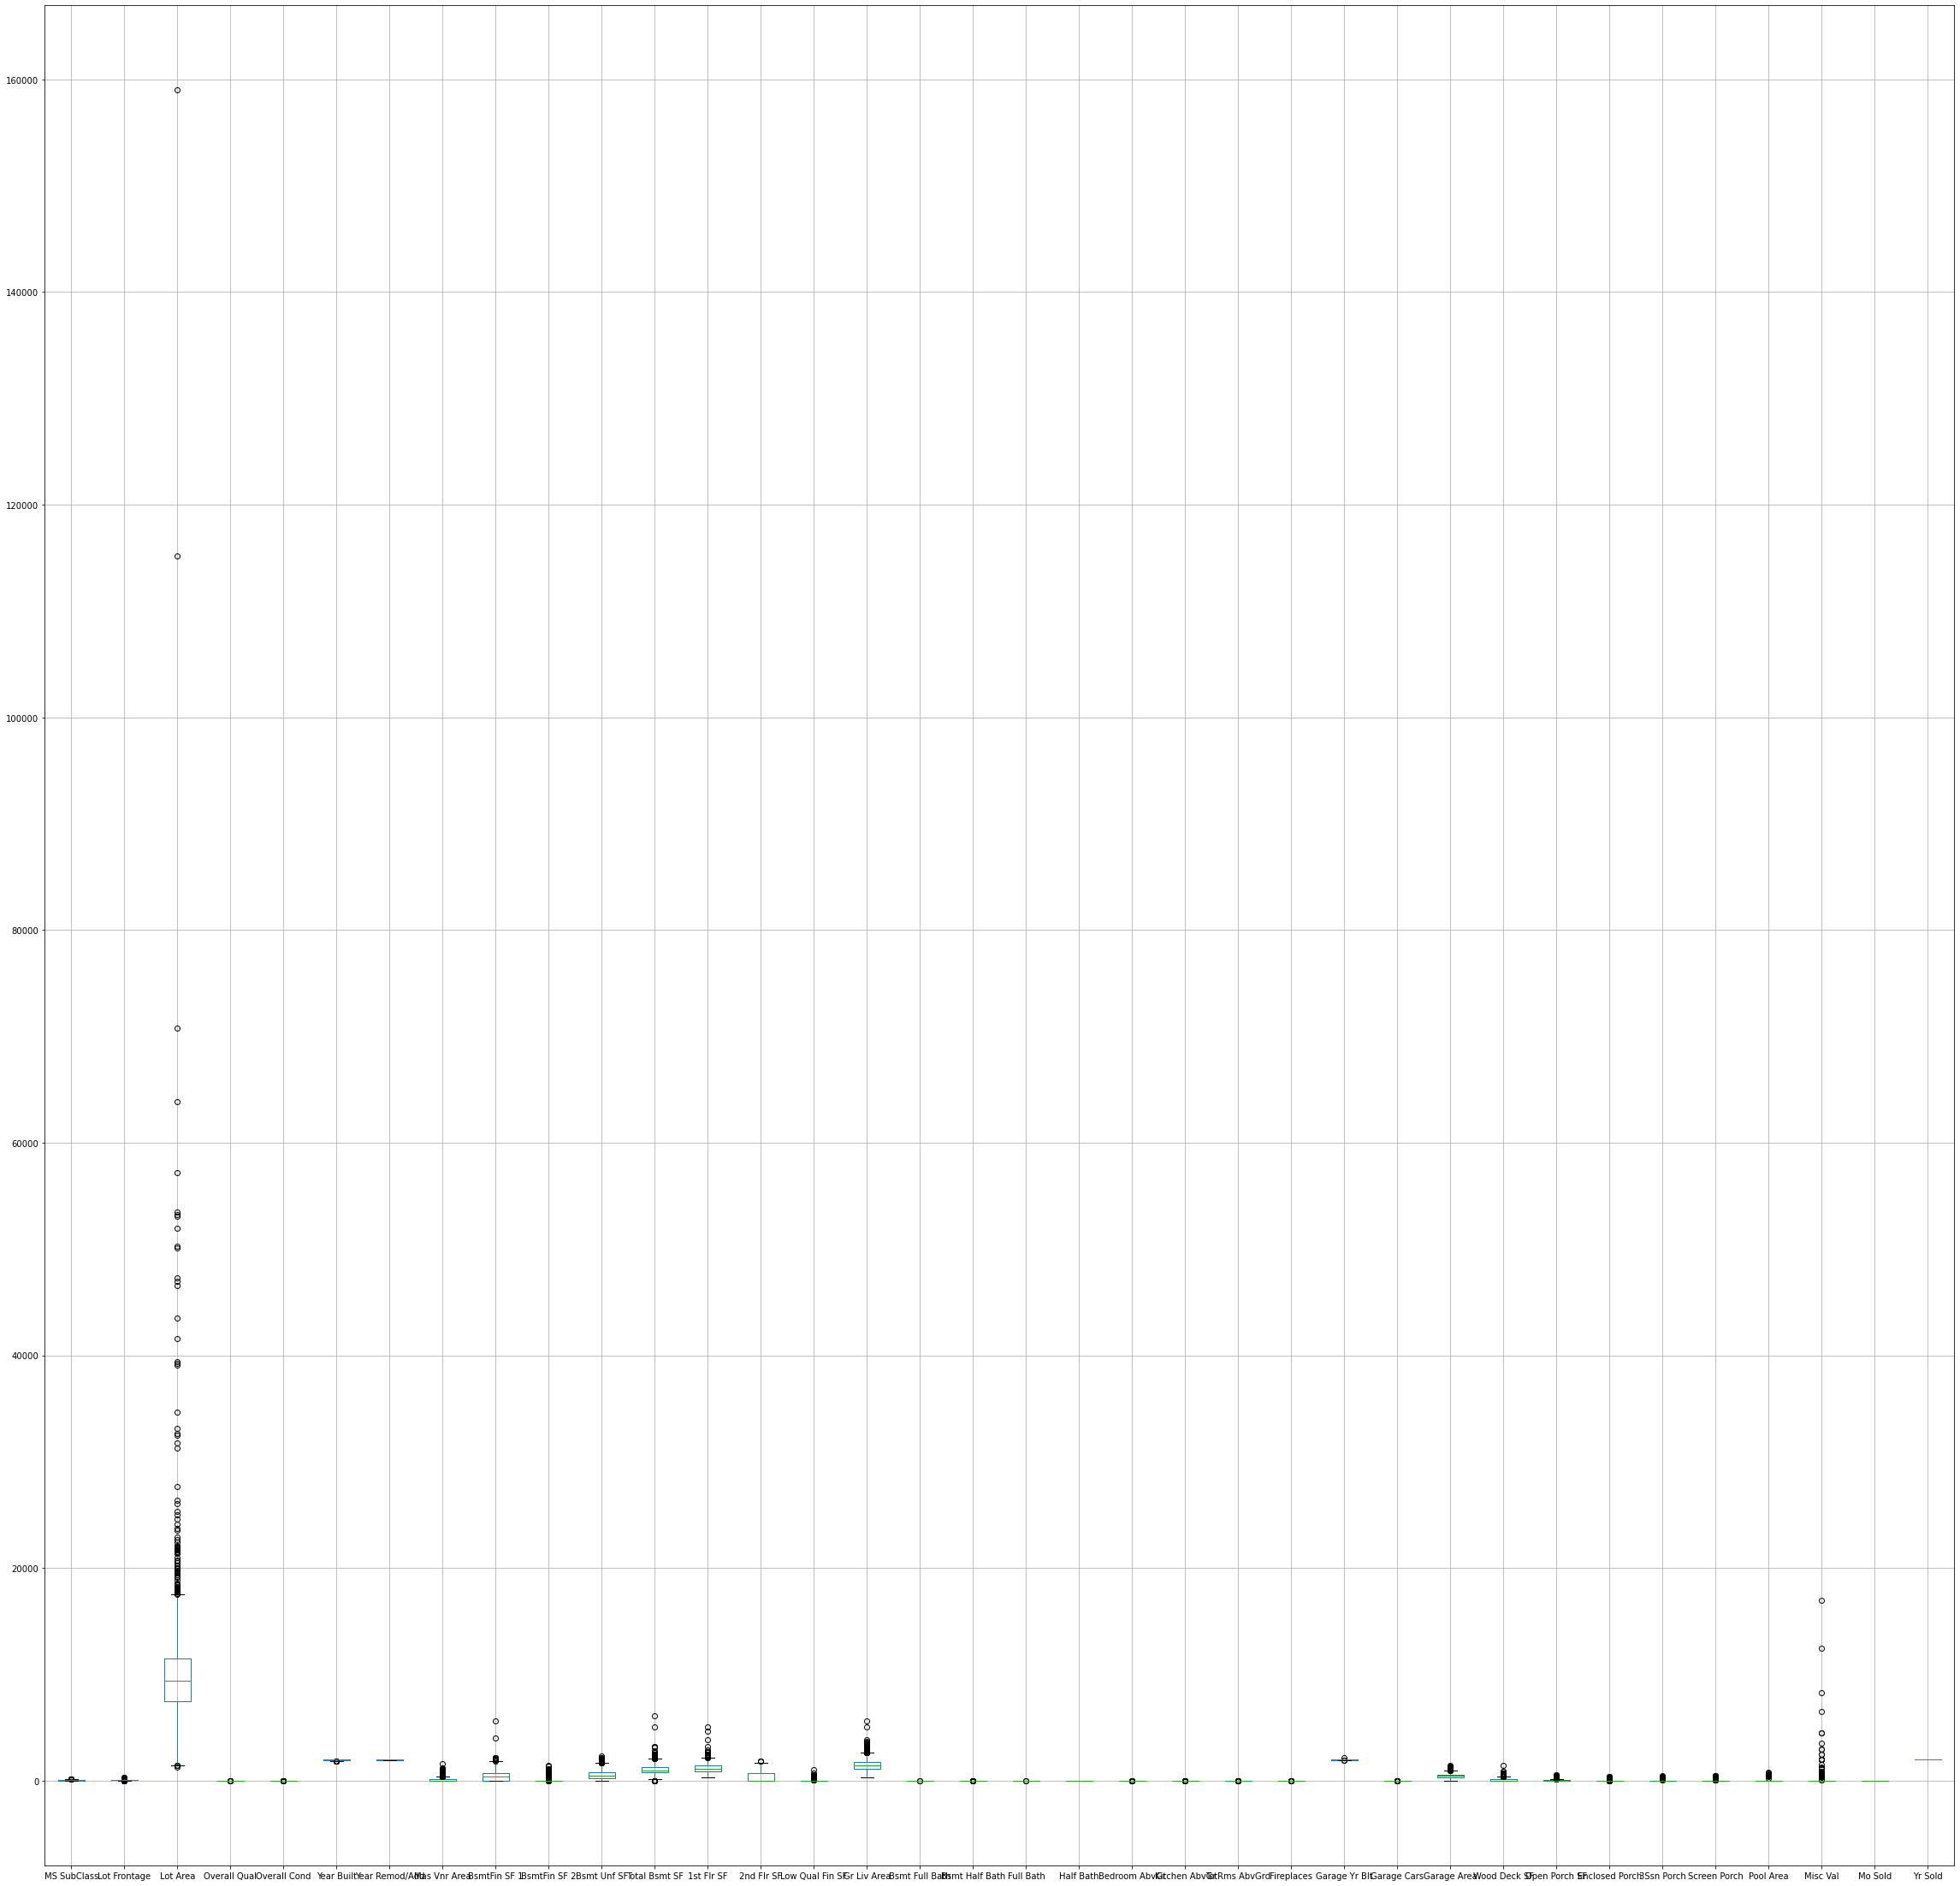

In [9]:
plt.figure(figsize=(40,40)) 
X[numeric_features].boxplot()

<AxesSubplot:>

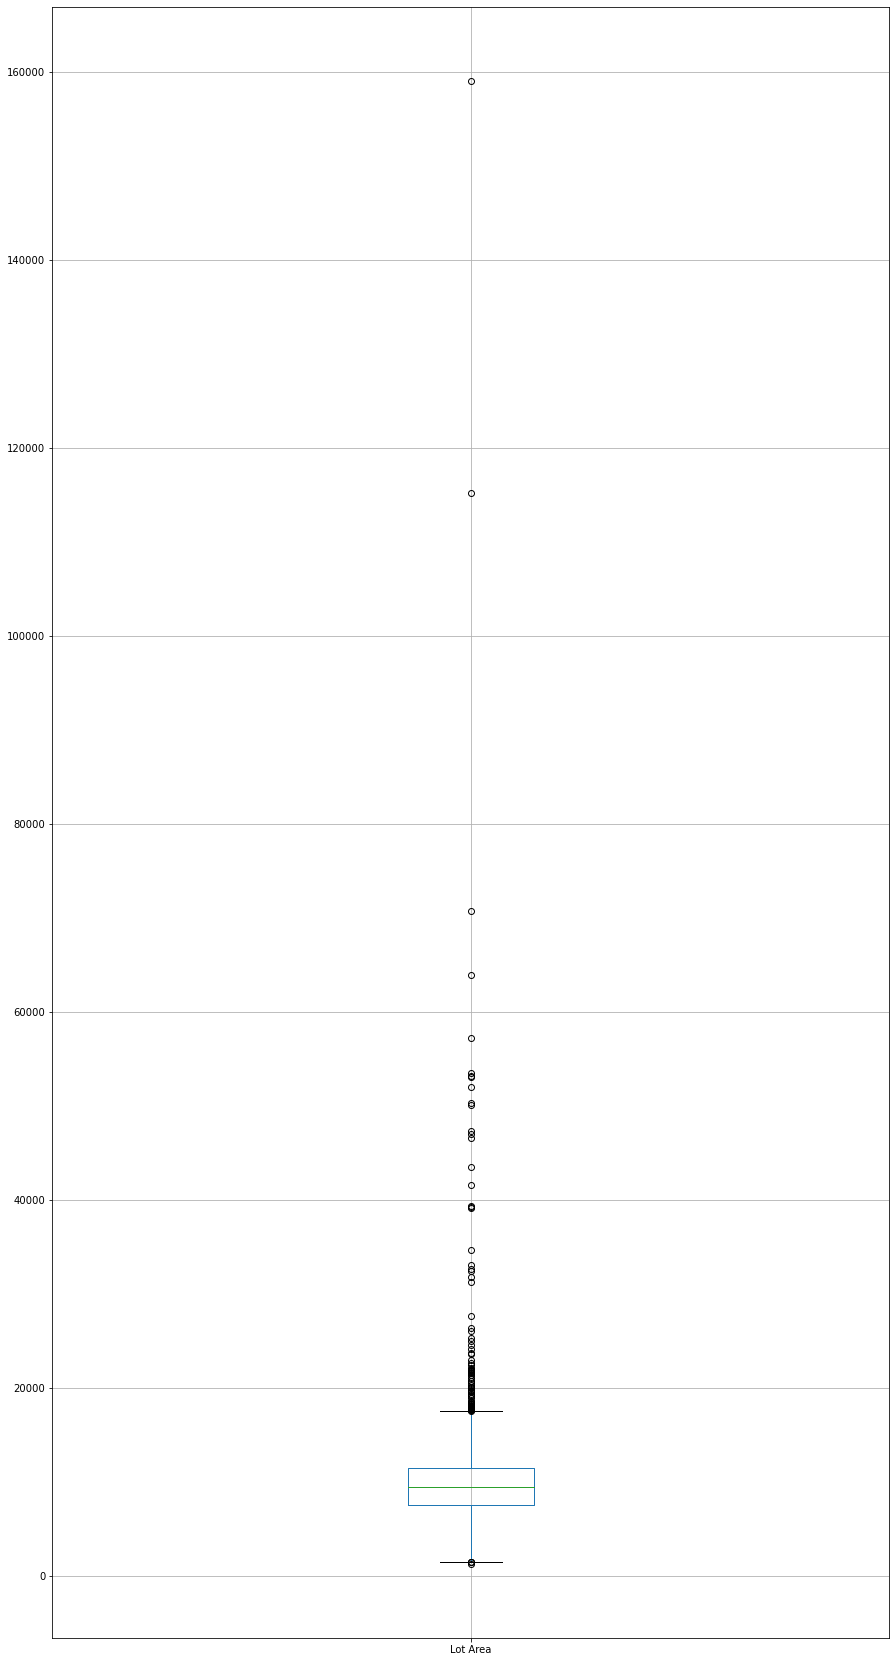

In [10]:
plt.figure(figsize=(15,30))
X[['Lot Area']].boxplot()

## Findings
Based on eda, there is outliers. Thus I will use robustscaler for features scaling in future

## Dimensionality reduction 1 
### Drop Null

The features to be dropped due to too many null values. (>48%)

|Features|Null count|
|-----|--------|
|Fireplace Qu    |  1000|
|Fence           |   1651|
|Alley           |   1911|
|Misc Feature    |   1986|
|Pool QC         |   2042|


### Year Calculation
Year build and Year of Remod/Add should be evaluated together with year sold 

In the actual model, I add customised transformer for this. (please refer to DataTransformer.py)

In [11]:
train.drop(columns=['Fireplace Qu','Fence','Alley','Misc Feature','Pool QC'],inplace=True)

In [12]:
types = train.dtypes.to_frame().reset_index()
types = types.rename(columns= {'index': 'feature', 0: 'dtype'})
types.index.name = 'index'

In [13]:
corr = train.corr()['SalePrice'].sort_values()
corr = corr.to_frame().reset_index()
corr = corr.rename(columns= {'index': 'feature', 'SalePrice': 'corr'})
corr.index.name = 'index'

In [14]:
cols = corr.merge( types, how='right', on ='feature' )
cols

,feature,corr,dtype
0,Id,-0.051398,int64
1,PID,-0.255052,int64
2,MS SubClass,-0.087335,int64
3,MS Zoning,NaN,object
4,Lot Frontage,0.341842,float64
5,Lot Area,0.296566,int64
6,Street,NaN,object
7,Lot Shape,NaN,object
8,Land Contour,NaN,object
9,Utilities,NaN,object


In [15]:
cols.loc[cols['corr']>0.47]

,feature,corr,dtype
17,Overall Qual,0.800207,int64
19,Year Built,0.571849,int64
20,Year Remod/Add,0.550370,int64
26,Mas Vnr Area,0.512230,float64
38,Total Bsmt SF,0.628925,float64
43,1st Flr SF,0.618486,int64
46,Gr Liv Area,0.697038,int64
49,Full Bath,0.537969,int64
54,TotRms AbvGrd,0.504014,int64
56,Fireplaces,0.471093,int64


In [16]:
# list of non numeric features  to encode
cols.loc[cols['corr'].isnull()]

,feature,corr,dtype
3,MS Zoning,NaN,object
6,Street,NaN,object
7,Lot Shape,NaN,object
8,Land Contour,NaN,object
9,Utilities,NaN,object
10,Lot Config,NaN,object
11,Land Slope,NaN,object
12,Neighborhood,NaN,object
13,Condition 1,NaN,object
14,Condition 2,NaN,object


In [17]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [18]:
X_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
748,2353,527358090,85,RL,NaN,9927,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SFoyer,7,5,1976,1976,Gable,CompShg,VinylSd,Wd Shng,Stone,252.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1005.0,Unf,0.0,42.0,1047.0,GasA,TA,Y,SBrkr,1083,0,0,1083,1.0,0.0,1,0,2,1,TA,5,Typ,1,Attchd,1976.0,RFn,2.0,596.0,TA,TA,Y,444,0,40,0,0,0,0,7,2006,WD
671,1888,534278150,20,RL,NaN,14357,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1961,1961,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,311.0,LwQ,167.0,386.0,864.0,GasA,TA,Y,SBrkr,1187,0,0,1187,1.0,0.0,1,0,2,1,TA,6,Typ,1,Attchd,1961.0,RFn,2.0,440.0,TA,TA,Y,128,0,0,0,0,0,0,8,2007,CWD
484,1875,534201040,20,RL,70.0,8050,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1967,1993,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,474.0,BLQ,38.0,437.0,949.0,GasA,TA,Y,SBrkr,1107,0,0,1107,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Attchd,1967.0,RFn,1.0,308.0,TA,TA,Y,88,64,0,0,0,0,0,3,2007,WD
1389,66,528386040,50,RL,56.0,14720,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1995,1996,Hip,CompShg,VinylSd,VinylSd,BrkFace,579.0,Gd,TA,PConc,Gd,TA,Av,GLQ,816.0,Unf,0.0,1217.0,2033.0,GasA,Ex,Y,SBrkr,2053,1185,0,3238,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,1996.0,Fin,3.0,666.0,TA,TA,Y,283,86,0,0,0,0,0,3,2010,WD
1228,1424,906378190,60,RL,65.0,10616,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,628.0,628.0,GasA,Ex,Y,SBrkr,628,728,0,1356,0.0,0.0,2,1,3,1,Gd,6,Typ,1,BuiltIn,2007.0,Fin,2.0,484.0,TA,TA,Y,100,24,0,0,0,0,0,3,2008,New


## Encoding 

### Non ordinal categorical feature:

**One-Hot Encoding** for following Non ordinal categorical feature

* MSZoning: Identifies the general zoning classification of the sale.

* Street: Type of road access to property

* LotShape: General shape of property

* LandContour: Flatness of the property

* Utilities: Type of utilities available

* LotConfig: Lot configuration
 
* Neighborhood: Physical locations within Ames city limits
 
* **Condition1 and 2**(if indicated): Proximity to main road or railroad
 
* BldgType: Type of dwelling

* HouseStyle: Style of dwelling
 
* RoofStyle: Type of roof

* RoofMatl: Roof material
 
* **Exterior1st and Exterior2nd**(if indicated): Exterior covering on house
 
* MasVnrType: Masonry veneer type
 
* Foundation: Type of foundation
* Heating: Type of heating
* Electrical: Electrical system
* GarageType: Garage location
* SaleType: Type of sale


Use OneHotEncoder for the rest

In [19]:
# Non ordinal categorical features
non_ordinal_categ = ['MS Zoning', 'Street', 'Lot Shape','Land Contour','Utilities',\
                     'Lot Config','Neighborhood','Bldg Type','House Style','Roof Style', 'Roof Matl',\
                     'Mas Vnr Type','Foundation','Heating','Electrical','Garage Type','Sale Type',\
                    'Condition 1','Condition 2','Exterior 1st','Exterior 2nd']

**Label Encoding** for below ordinal categorical feature

**LandSlope: Slope of property**
1. Gtl Gentle slope
2. Mod Moderate Slope
3. Sev Severe Slope

**ExterQual: Exterior material quality**
1. Po Poor
2. Fa Fair
3. TA Average/Typical
4. Gd Good
5. Ex Excellent

**ExterCond: Present condition of the material on the exterior**
1. Po Poor
2. Fa Fair
3. TA Average/Typical
4. Gd Good
5. Ex Excellent


**BsmtQual: Height of the basement**

0.  NA No Basement
1.  Po Poor (<70 inches)
2.  Fa Fair (70-79 inches)
3.  TA Typical (80-89 inches)
4.  Gd Good (90-99 inches)
5.  Ex Excellent (100+ inches)

**BsmtCond: General condition of the basement**

0. NA No Basement
1.  Po Poor - Severe cracking, settling, or wetness
1.  Fa Fair - dampness or some cracking or settling
1.  TA Typical - slight dampness allowed
1.  Gd Good
1.  Ex Excellent


**BsmtExposure: Walkout or garden level basement walls**

0. NA No Basement
1.  No No Exposure
1.  Mn Mimimum Exposure
1.  Av Average Exposure (split levels or foyers typically score average or above)
1.  Gd Good Exposure


**BsmtFinType1: Quality of basement finished area**

0. NA No Basement
1.  Unf Unfinshed
1.  LwQ Low Quality
1.  Rec Average Rec Room
1.  BLQ Below Average Living Quarters
1.  ALQ Average Living Quarters
1.  GLQ Good Living Quarters


**BsmtFinType2: Quality of second finished area (if present)**

0. NA No Basement
1.  Unf Unfinshed
1.  LwQ Low Quality
1.  Rec Average Rec Room
1.  BLQ Below Average Living Quarters
1.  ALQ Average Living Quarters
1.  GLQ Good Living Quarters


**HeatingQC: Heating quality and condition**
1. Po Poor
2. Fa Fair
3. TA Average/Typical
4. Gd Good
5. Ex Excellent


**CentralAir: Central air conditioning**

0. N No
1. Y Yes

**KitchenQual: Kitchen quality**
1. Po Poor
2. Fa Fair
3. TA Average/Typical
4. Gd Good
5. Ex Excellent

**Functional: Home functionality rating**
1. Sal Salvage only
1. Sev Severely Damaged
1. Maj2 Major Deductions 2
1. Maj1 Major Deductions 1
1. Mod Moderate Deductions
1. Min2 Minor Deductions 2
1. Min1 Minor Deductions 1
1. Typ Typical Functionality


**GarageFinish: Interior finish of the garage**
1. NA No Garage
1. Unf Unfinished
1. RFn Rough Finished
1. Fin Finished

**GarageQual: Garage quality**

1. NA No Garage
1. Po Poor
2. Fa Fair
3. TA Average/Typical
4. Gd Good
5. Ex Excellent

**GarageCond: Garage condition**

1. NA No Garage
1. Po Poor
2. Fa Fair
3. TA Average/Typical
4. Gd Good
5. Ex Excellent


**PavedDrive: Paved driveway**

0. N Dirt/Gravel
1. P Partial Pavement
2. Y Paved


## Pipeline

In [20]:
ordinal_categ_features = ['Land Slope','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond',\
                          'Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Central Air',\
                          'Kitchen Qual','Functional','Garage Finish','Garage Qual','Garage Cond','Paved Drive']

In [21]:
Land_Slope =[['NA','Gtl', 'Mod', 'Sev']]
Exter_Qual = [['NA','Po', 'Fa','TA', 'Gd', 'Ex']]
Exter_Cond = [['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']]
Bsmt_Qual = [['NA', 'Po', 'Fa','TA', 'Gd', 'Ex']]
Bsmt_Cond = [['NA', 'Po', 'Fa','TA', 'Gd', 'Ex']]
Bsmt_Exposure = [['NA', 'No', 'Mn', 'Av', 'Gd']]
BsmtFinType1 = [['NA', 'Unf', 'LwQ','Rec','BLQ','ALQ','GLQ']]
BsmtFinType2 = [['NA', 'Unf', 'LwQ','Rec','BLQ','ALQ','GLQ']]
Heating_QC = [['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']]
Central_Air = [['NA','N','Y']]
Kitchen_Qual = [['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']]
Functional = [['NA','Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']]
Garage_Finish = [['NA','Unf','RFn','Fin']]
Garage_Qual = [['NA', 'Po', 'Fa','TA', 'Gd', 'Ex']]
Garage_Cond = [['NA', 'Po', 'Fa','TA', 'Gd', 'Ex']]
Paved_Drive = [['NA','N','P','Y']]

In [22]:
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median'))
    ]) 


categorical_features = non_ordinal_categ
categorical_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) 


preprocessor = ColumnTransformer( transformers=[ 
    ('o1',OrdinalEncoder(categories= Land_Slope,handle_unknown='use_encoded_value', unknown_value=-1), [11]),
    ('o2',OrdinalEncoder(categories= Exter_Qual,handle_unknown='use_encoded_value', unknown_value=-1), [27]),
    ('o3',OrdinalEncoder(categories= Exter_Cond,handle_unknown='use_encoded_value', unknown_value=-1), [28]),
    ('o4',OrdinalEncoder(categories= Bsmt_Qual,handle_unknown='use_encoded_value', unknown_value=-1), [30]),
    ('o5',OrdinalEncoder(categories= Bsmt_Cond,handle_unknown='use_encoded_value', unknown_value=-1), [31]),
    ('o6',OrdinalEncoder(categories= Bsmt_Exposure,handle_unknown='use_encoded_value', unknown_value=-1), [32]),
    ('o7',OrdinalEncoder(categories= BsmtFinType1,handle_unknown='use_encoded_value', unknown_value=-1), [33]),
    ('o8',OrdinalEncoder(categories= BsmtFinType2,handle_unknown='use_encoded_value', unknown_value=-1), [35]),
    ('o9',OrdinalEncoder(categories= Heating_QC,handle_unknown='use_encoded_value', unknown_value=-1), [40]),
    ('o10',OrdinalEncoder(categories= Central_Air,handle_unknown='use_encoded_value', unknown_value=-1), [41]),
    ('o11',OrdinalEncoder(categories= Kitchen_Qual,handle_unknown='use_encoded_value', unknown_value=-1), [53]),
    ('o12',OrdinalEncoder(categories= Functional,handle_unknown='use_encoded_value', unknown_value=-1), [55]),
    ('o13',OrdinalEncoder(categories= Garage_Finish,handle_unknown='use_encoded_value', unknown_value=-1), [59]),
    ('o14',OrdinalEncoder(categories= Garage_Qual,handle_unknown='use_encoded_value', unknown_value=-1), [62]),
    ('o15',OrdinalEncoder(categories= Garage_Cond,handle_unknown='use_encoded_value', unknown_value=-1), [63]),
    ('o16',OrdinalEncoder(categories= Paved_Drive,handle_unknown='use_encoded_value', unknown_value=-1), [64]), 
    ('num', numeric_transformer, numeric_features), 
    ('cat', categorical_transformer, categorical_features)])

In [23]:
pipeline = Pipeline(steps=[
                      ('preprocessor', preprocessor),
                      #('regressor', LinearRegression())
])


In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('o1',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Gtl',
                                                                              'Mod',
                                                                              'Sev']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [11]),
                                                 ('o2',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [27]),
                                                 ('o3',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Po'...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MS Zoning', 'Street',
                                                   'Lot Shape', 'Land Contour',
                                                   'Utilities', 'Lot Config',
                                                   'Neighborhood', 'Bldg Type',
                                                   'House Style', 'Roof Style',
                                                   'Roof Matl', 'Mas Vnr Type',
                                                   'Foundation', 'Heating',
                                                   'Electrical', 'Garage Type',
                                                   'Sale Type', 'Condition 1',
                                                   'Condition 2',
                                                   'Exterior 1st',
                                                   'Exterior 2nd'])]))])

In [25]:
df = pipeline.transform(X_train)
print(df)

[[1. 4. 3. ... 0. 0. 1.]
 [1. 3. 3. ... 0. 1. 0.]
 [1. 3. 3. ... 0. 0. 0.]
 ...
 [1. 3. 3. ... 1. 0. 0.]
 [1. 4. 3. ... 1. 0. 0.]
 [1. 4. 3. ... 1. 0. 0.]]


In [26]:
names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()
for i in range(1,18):
    names = np.concatenate([names, pipeline.named_steps['preprocessor'].transformers_[i][1].get_feature_names_out()])

len(names)

210

In [27]:
X_train.shape

(1640, 75)

In [28]:
# supposed number of features after transformation  
X_train.shape[1] - len(categorical_features) + len(pipeline.named_steps['preprocessor'].transformers_[17][1].get_feature_names_out()) -2 # id and PID not included

210

In [29]:
df.shape

(1640, 210)

In [30]:
## get pipeline feature names of non ordinal features

cat_cols = pipeline.named_steps['preprocessor'].transformers_[-2][1]\
   .named_steps['onehot'].get_feature_names_out(categorical_features)

len(cat_cols)

158

In [31]:
## specify feature names as columns
all_features = pd.DataFrame(df, columns=names)
all_features.head()

,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Kitchen Qual,Functional,Garage Finish,Garage Qual,Garage Cond,Paved Drive,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Mas Vnr Type_missing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_missing,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRNn,Exterior 1st_AsbShng,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng
0,1.0,4.0,3.0,5.0,3.0,4.0,6.0,1.0,3.0,2.0,3.0,8.0,2.0,3.0,3.0,3.0,85.0,68.0,9927.0,7.0,5.0,1976.0,1976.0,252.0,1005.0,0.0,42.0,1047.0,1083.0,0.0,0.0,1083.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,1.0,1976.0,2.0,596.0,444.0,0.0,40.0,0.0,0.0,0.0,0.0,7.0,2006.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [32]:
price = pd.DataFrame( y_train, columns=['SalePrice'])
price.reset_index(drop=True,inplace=True)
price.head()

,SalePrice
0,172000
1,140500
2,127000
3,410000
4,177439


In [33]:
df_tf = pd.concat([all_features,price],axis=1)
df_tf.head()

,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Kitchen Qual,Functional,Garage Finish,Garage Qual,Garage Cond,Paved Drive,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Mas Vnr Type_missing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_missing,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRNn,Exterior 1st_AsbShng,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,SalePrice
0,1.0,4.0,3.0,5.0,3.0,4.0,6.0,1.0,3.0,2.0,3.0,8.0,2.0,3.0,3.0,3.0,85.0,68.0,9927.0,7.0,5.0,1976.0,1976.0,252.0,1005.0,0.0,42.0,1047.0,1083.0,0.0,0.0,1083.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,1.0,1976.0,2.0,596.0,444.0,0.0,40.0,0.0,0.0,0.0,0.0,7.0,2006.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

<AxesSubplot:>

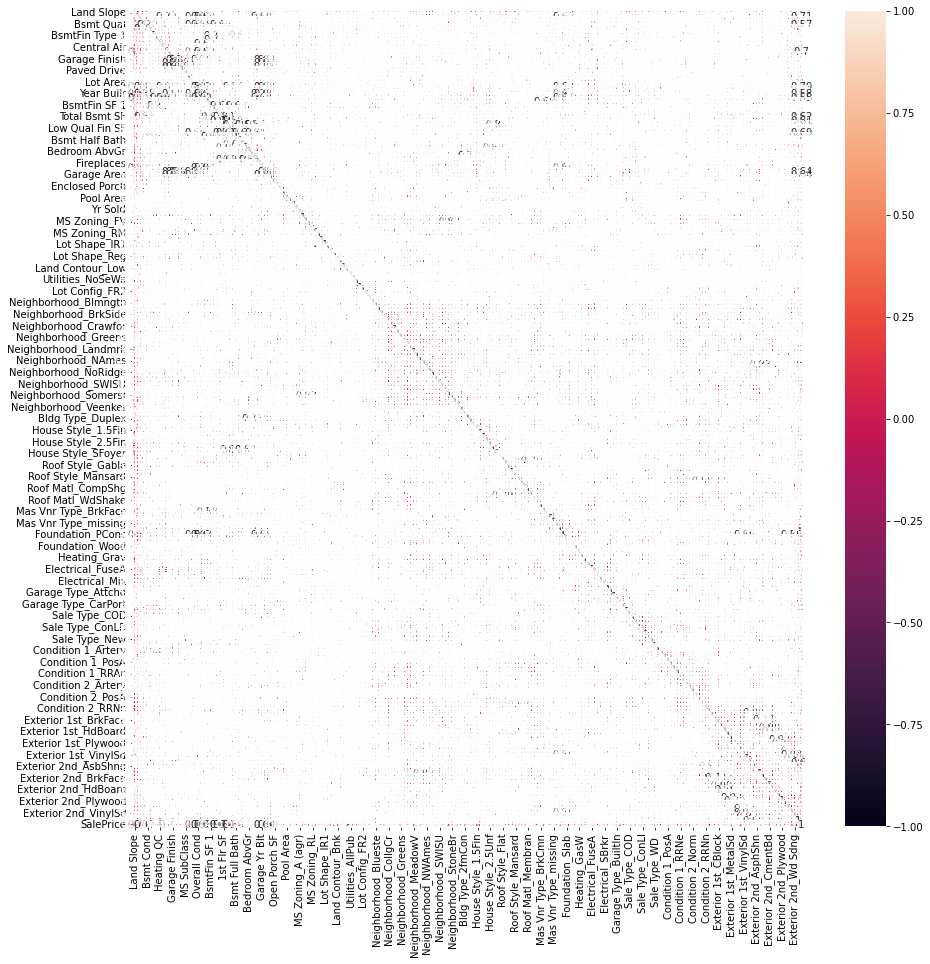

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df_tf.corr(),annot=True)

<AxesSubplot:>

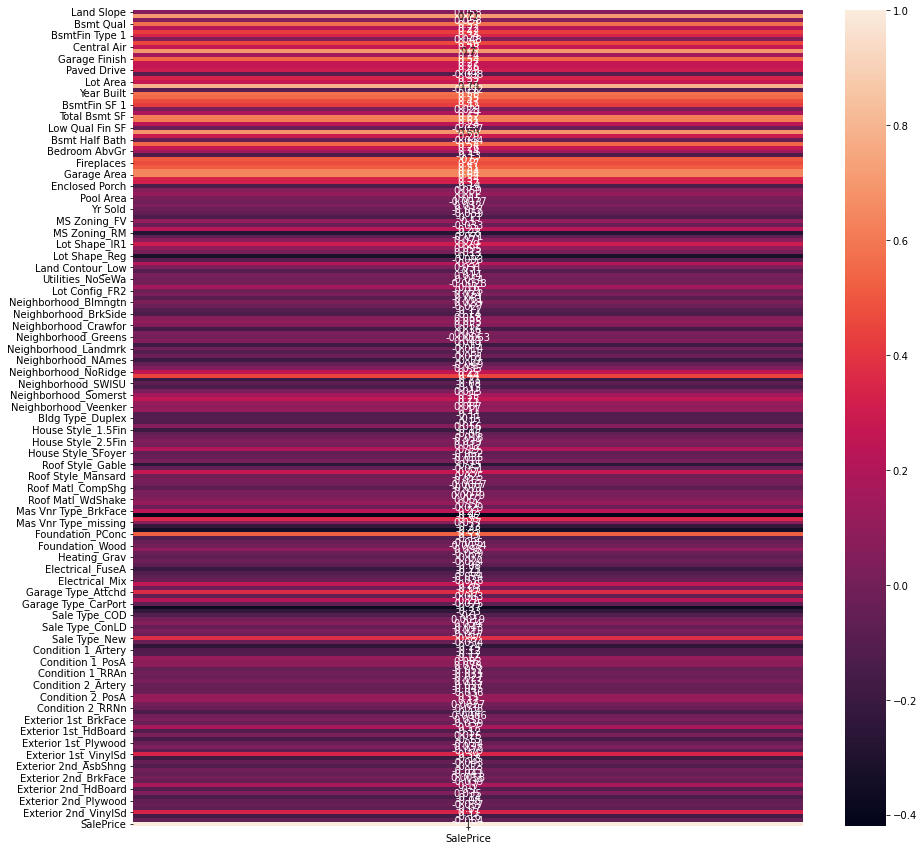

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df_tf.corr().loc[:,['SalePrice']],annot=True)

In [36]:
corr = df_tf.corr().loc[:,['SalePrice']]
corr = corr[ (corr['SalePrice'] >= 0.5) | (corr['SalePrice'] <= -0.5) ]
df_corr = corr.sort_values('SalePrice',ascending=False)
df_corr

,SalePrice
SalePrice,1.000000
Overall Qual,0.794705
Exter Qual,0.709171
Kitchen Qual,0.695781
Gr Liv Area,0.689390
Garage Cars,0.641477
Garage Area,0.640193
Total Bsmt SF,0.621023
1st Flr SF,0.606099
Year Built,0.575505


<AxesSubplot:>

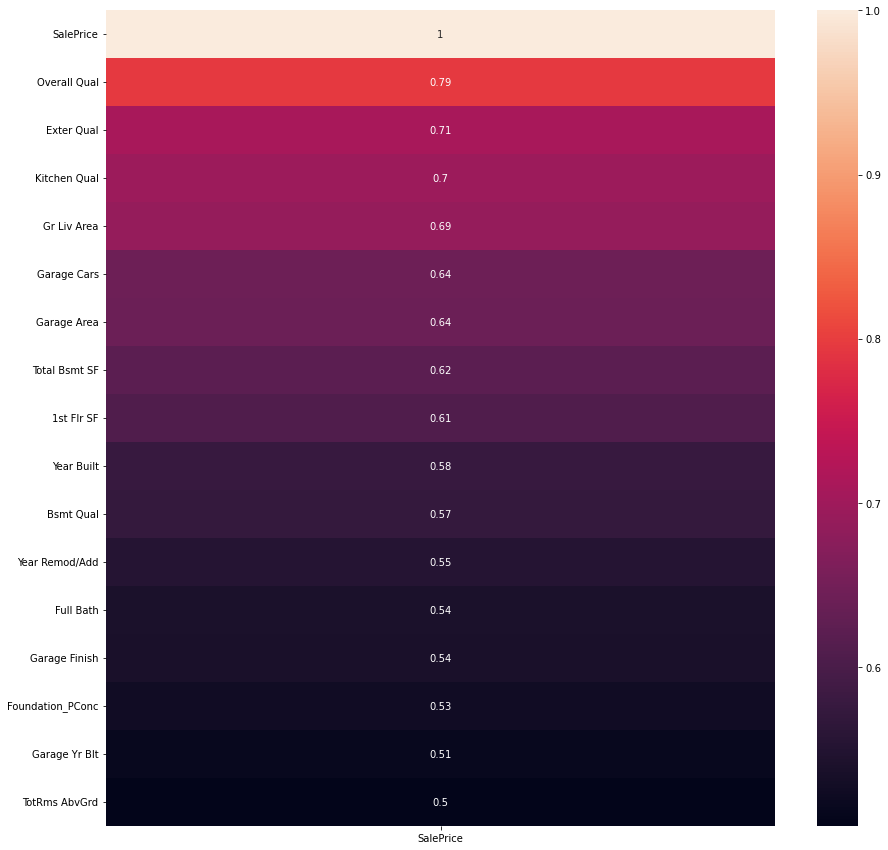

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr.loc[:,['SalePrice']],annot=True)

<AxesSubplot:>

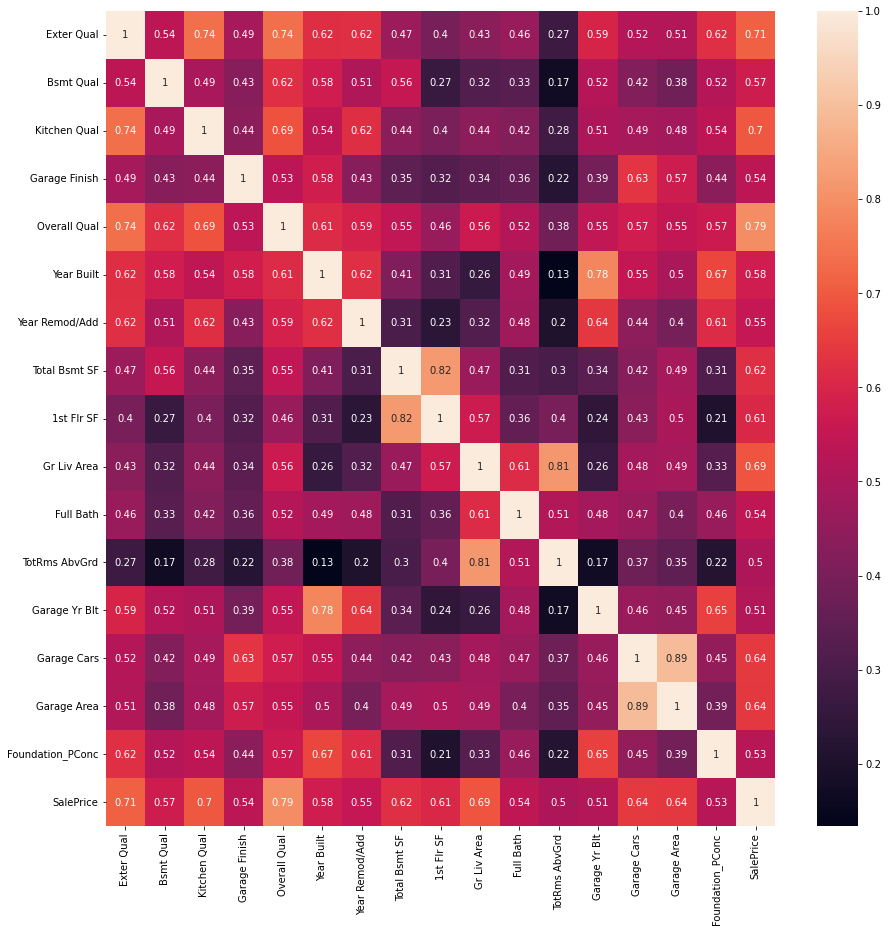

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(df_tf[list(corr.index)].corr(),annot=True)


## Fit in Baseline Model (with selected features)
Based on Correlation, the following features are selected to build linear regression model.

|Features|Corr|
|-----|--------|
|SalePrice |	1.000000|
|Overall Qual|	0.794705|
|Exter Qual|	0.709171|
|Kitchen Qual|	0.695781|
|Gr Liv Area|	0.689390|
|Garage Cars|	0.641477|
|Garage Area|	0.640193|
|Total Bsmt SF|	0.621023|
|1st Flr SF|	0.606099|
|Year Built|	0.575505|
|Bsmt Qual|	0.571820|
|Year Remod/Add|	0.552747|
|Full Bath|	0.539874|
|Garage Finish|	0.536605|
|Foundation_PConc|	0.525845|
|Garage Yr Blt|	0.514119|
|TotRms AbvGrd|	0.503114|

In [39]:
Pr_features = list(corr.index)[:-1]
Pr_features

['Exter Qual',
 'Bsmt Qual',
 'Kitchen Qual',
 'Garage Finish',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'TotRms AbvGrd',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Foundation_PConc']

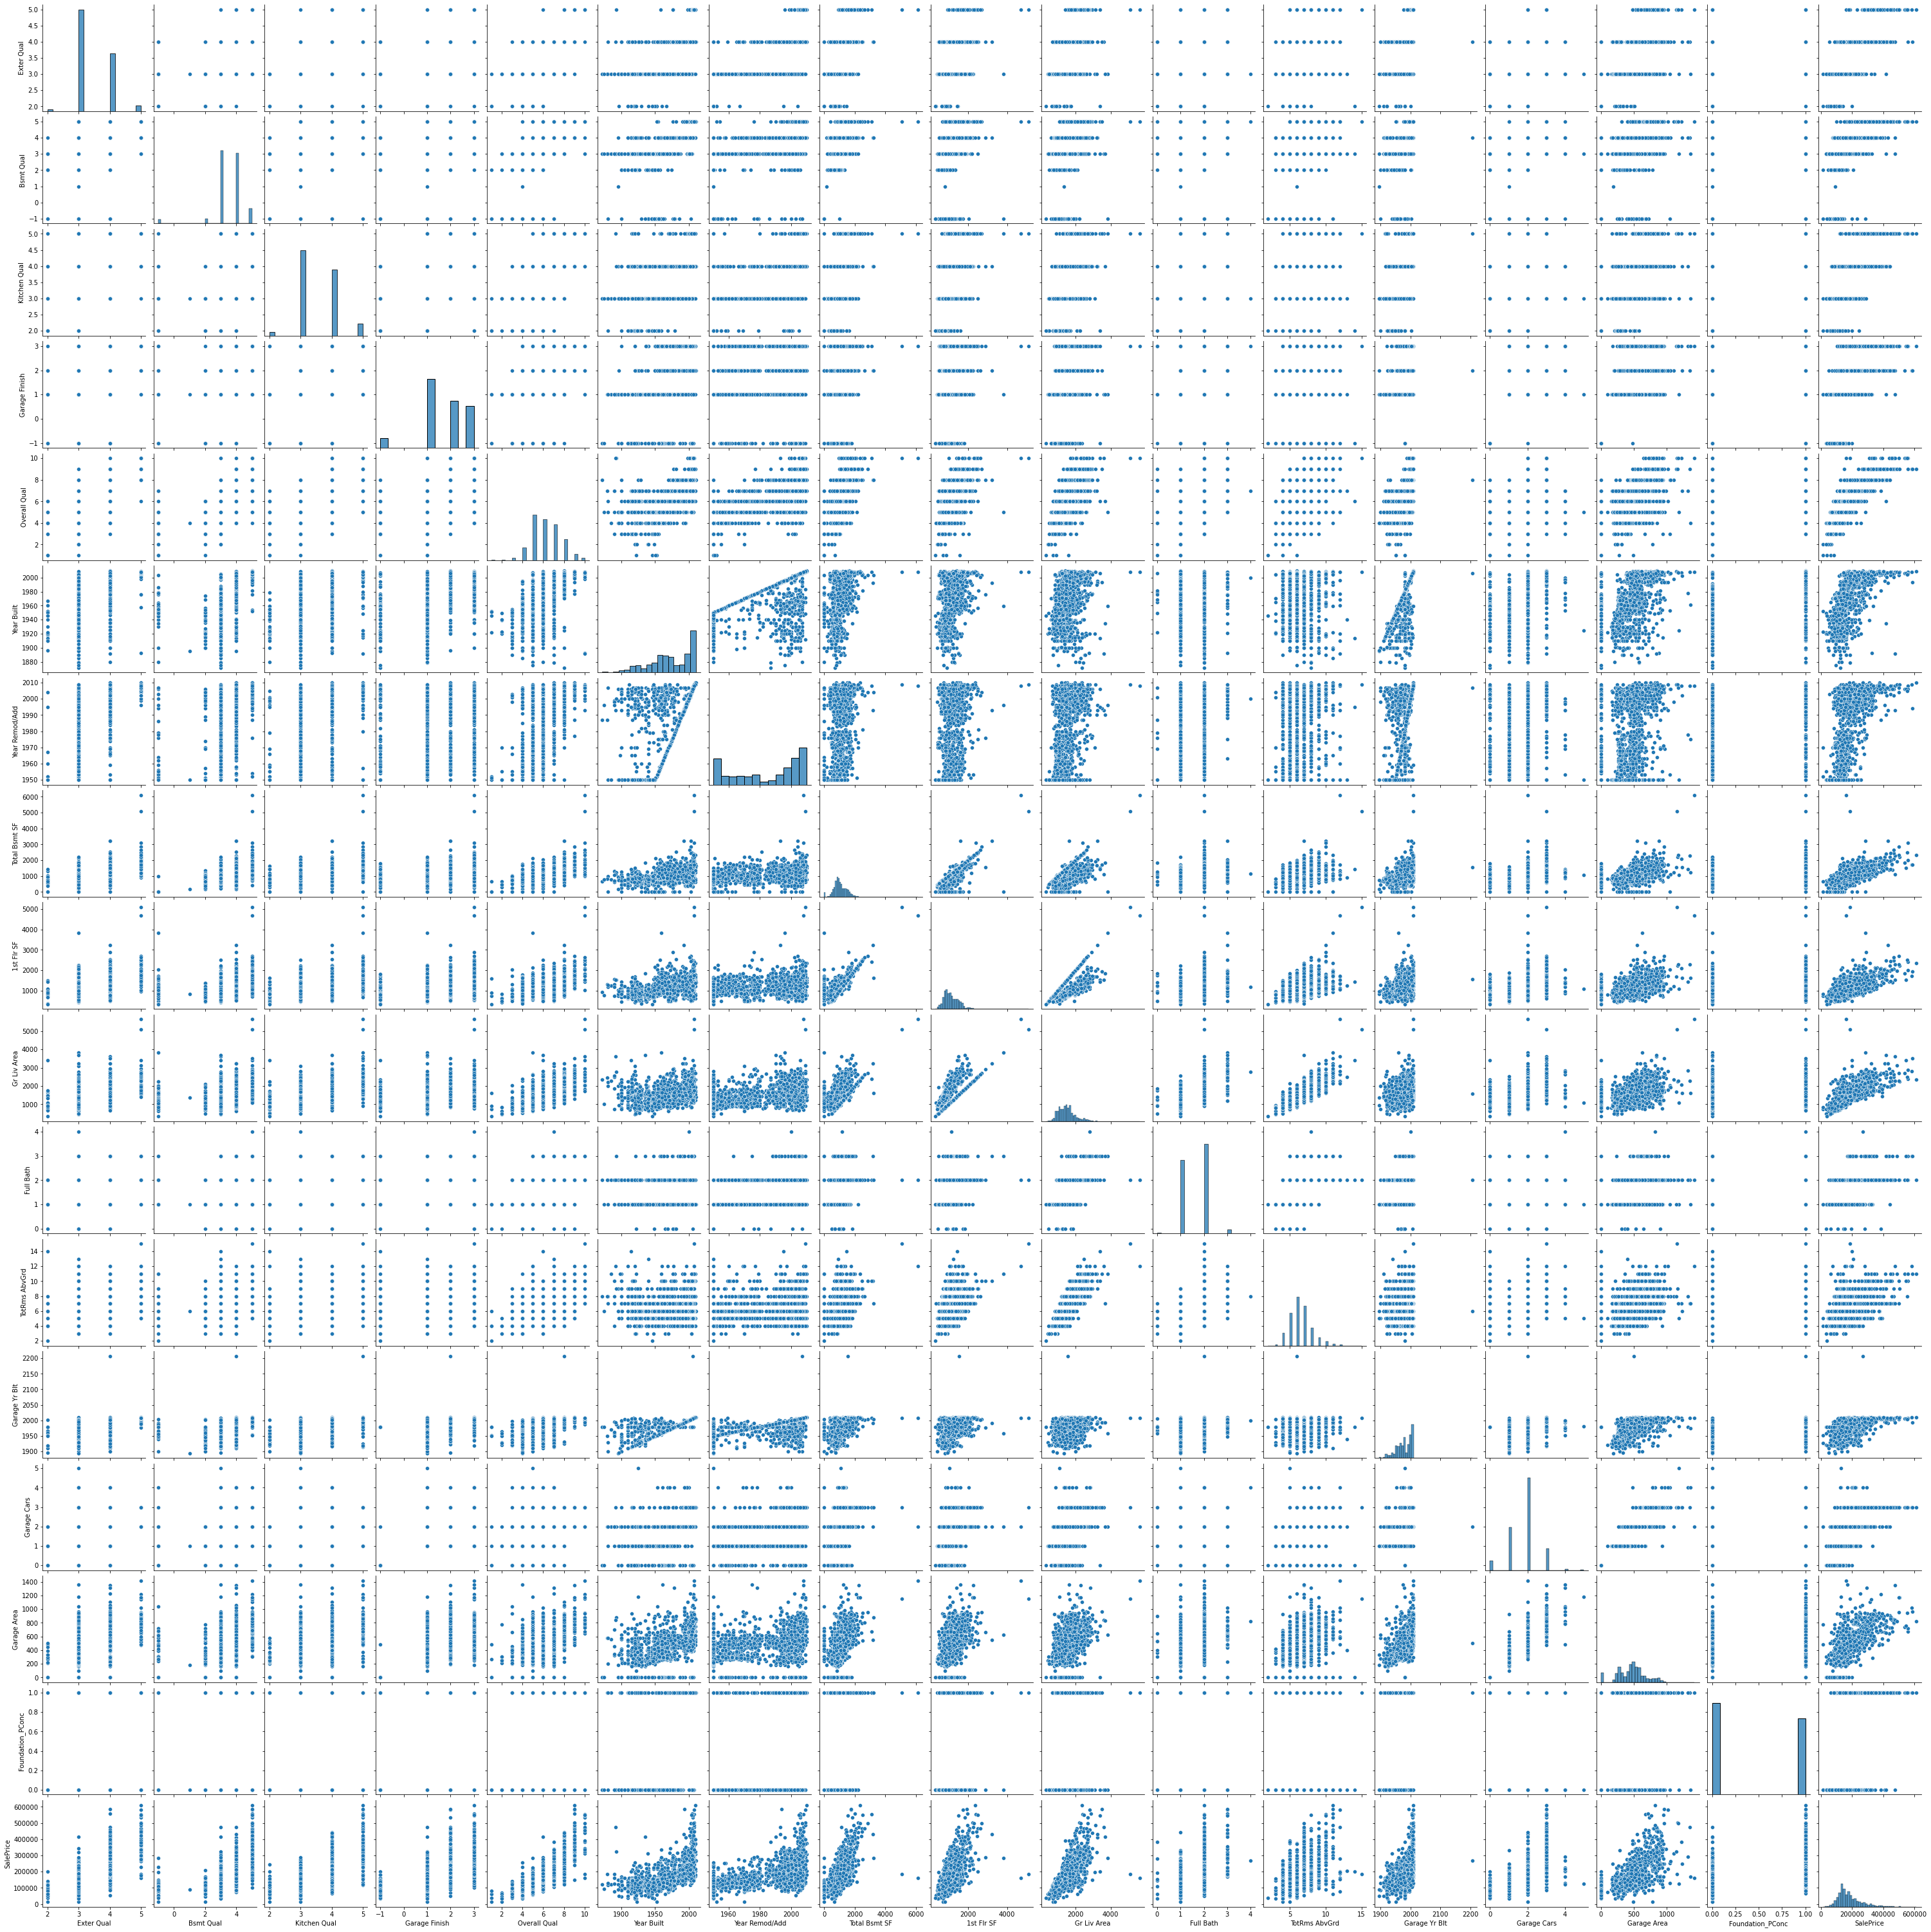

In [40]:
prf = df_tf[list(corr.index)]
sns.pairplot(prf)

In [41]:
# Extract position of principle features from pipeline for slicing and feature selection
dict = {key:  index for index, key in enumerate(df_tf.columns)}
pos = [ dict[x] for x in Pr_features]
pos = tuple(pos)
pos

(1, 3, 10, 12, 19, 21, 22, 27, 28, 31, 34, 38, 40, 41, 42, 135)

In [42]:
# Define ColumnExtractor for features selection

class ColumnExtractor(object):

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
        col_list = []
        for c in self.cols:
            col_list.append(X[:, c:c+1])
        return np.concatenate(col_list, axis=1)

    def fit(self, X, y = None):
        return self

In [43]:
pipeline_b = Pipeline(steps=[
                      ('preprocessor', preprocessor),
                      ('scaler', RobustScaler()),
                      ('dim_red', ColumnExtractor(cols=pos)),
                      ('model', LinearRegression())
])

In [44]:
pipe_base = pipeline_b.fit(X_train,y_train)
pipe_base

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('o1',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Gtl',
                                                                              'Mod',
                                                                              'Sev']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [11]),
                                                 ('o2',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [27]),
                                                 ('o3',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Po'...
                                                   'Lot Shape', 'Land Contour',
                                                   'Utilities', 'Lot Config',
                                                   'Neighborhood', 'Bldg Type',
                                                   'House Style', 'Roof Style',
                                                   'Roof Matl', 'Mas Vnr Type',
                                                   'Foundation', 'Heating',
                                                   'Electrical', 'Garage Type',
                                                   'Sale Type', 'Condition 1',
                                                   'Condition 2',
                                                   'Exterior 1st',
                                                   'Exterior 2nd'])])),
                ('scaler', RobustScaler()),
                ('dim_red',
                 <__main__.ColumnExtractor object at 0x7f889b746c10>),
                ('model', LinearRegression())])

In [45]:
print('Base Model Train score:',pipe_base.score(X_train, y_train))
print('Base Model Test score:',pipe_base.score(X_test,y_test))

Base Model Train score: 0.7995106439470756
Base Model Test score: 0.8467470954659861


In [46]:
coefs = pipeline_b.named_steps["model"].coef_.flatten()
coef = pd.DataFrame(zip(Pr_features, coefs), columns=["feature", "coef"])
# coef of baseline model
coef

,feature,coef
0,Exter Qual,14575.535507
1,Bsmt Qual,6290.633882
2,Kitchen Qual,16486.546505
3,Garage Finish,2780.751657
4,Overall Qual,27485.253021
5,Year Built,7661.550860
6,Year Remod/Add,3365.193095
7,Total Bsmt SF,1873.791455
8,1st Flr SF,13856.966768
9,Gr Liv Area,23276.594515
